# **CineMania - A MOVIE RECOMMENDER SYSTEM**

---



## *Performing Pre-requisites*

In [ ]:
!pip install scikit-surprise

In [ ]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from ast import literal_eval

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the dataset

movies = pd.read_csv(r"/content/drive/MyDrive/New Dataset/movies.csv") #MovieLens Dataset
ratings = pd.read_csv(r"/content/drive/MyDrive/New Dataset/ratings.csv")

mov = pd.read_csv(r"/content/drive/MyDrive/New Dataset/tmdb_5000_movies.csv")
credits = pd.read_csv(r"/content/drive/MyDrive/New Dataset/tmdb_5000_credits.csv")

In [ ]:
credits.columns = ['id','title','cast','crew']
mov = mov.merge(credits, on='id',suffixes=(" "," "))
mov.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## *Data Visualization*

##### ***MovieLens Dataset***

In [ ]:
print("Shape of Movies dataset:",movies.shape)
print("Shape of Ratings dataset:",ratings.shape)

Shape of Movies dataset: (10329, 3)
Shape of Ratings dataset: (105339, 4)


In [ ]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [ ]:
ratings.describe()

#From here we can find out that:
#Average rating is 3.51
#Maximum rating is 5
#Minimum rating is 0.5

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [ ]:
genres = []
for genre in movies.genres:

    x=genre.split(' | ')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)

In [ ]:
#Generating wordcloud art for finding the highly used words.

wordcloud_genre = WordCloud(width=1500,height=800,background_color='black',min_font_size=2,min_word_length=3).generate(genres)
wordcloud_title = WordCloud(width=1500,height=800,background_color='white',min_font_size=2,min_word_length=3).generate(movie_title)

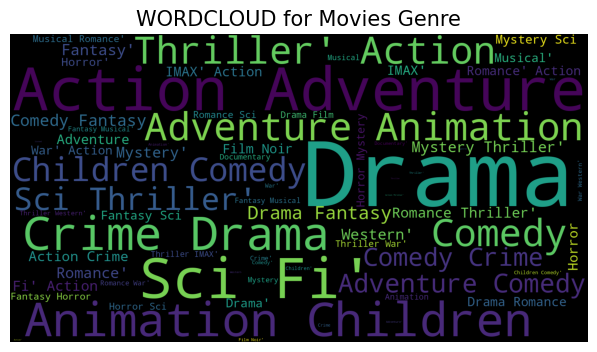

In [ ]:
#This depicts the highest amount of Genres

plt.figure(figsize=(12,4))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=15)
plt.imshow(wordcloud_genre)

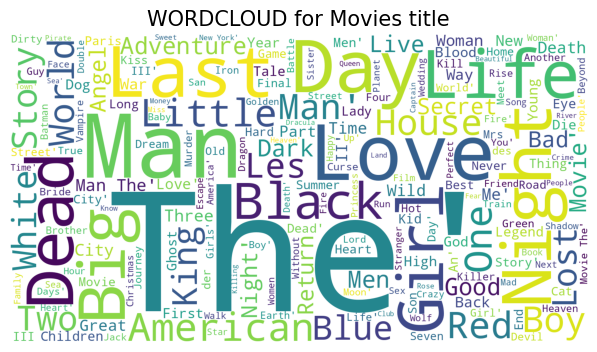

In [ ]:
plt.figure(figsize = (12,4))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize = 15)
plt.imshow(wordcloud_title)

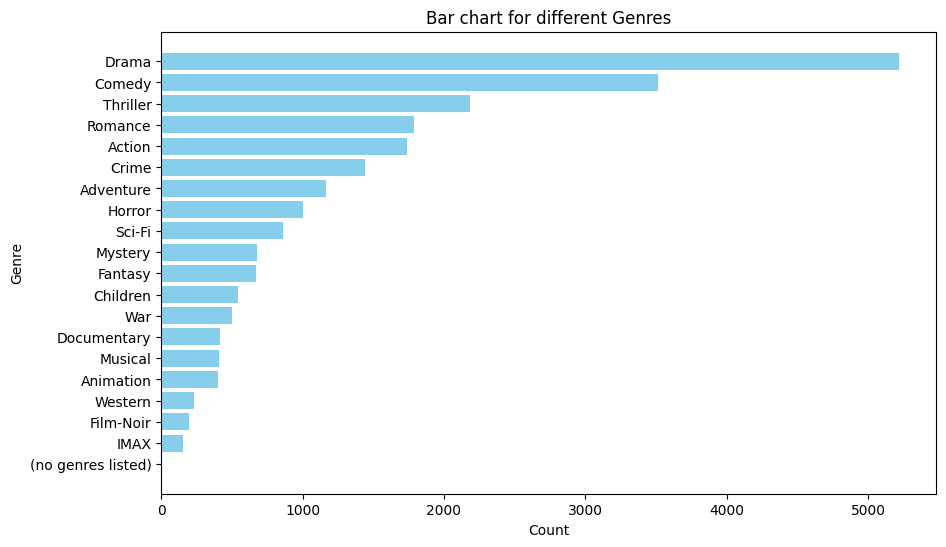

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is named 'movies'

# Splitting the genres and creating a list of all genres
all_genres = movies['genres'].str.split('|').sum()

# Counting the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(genre_counts.index, genre_counts.values, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Bar chart for different Genres')
plt.gca().invert_yaxis()  # Invert y-axis to have the genre with the highest count on top
plt.show()


##### ***TMDB 5000 Movie Database***

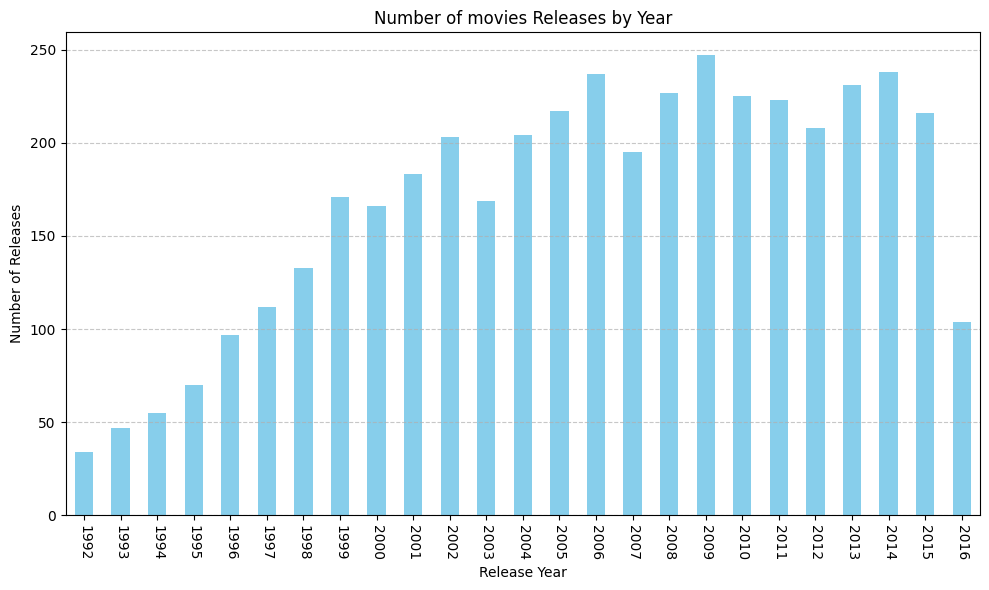

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the dataset and 'release_date' is the column name containing release dates
# Convert 'release_date' column to datetime format
mov.dropna(subset=['release_date'], inplace=True)

mov['release_date'] = pd.to_datetime(mov['release_date'], format='%Y-%m-%d')

mov.dropna(subset=['release_date'], inplace=True)
# Extract the year from the release date and create a new column 'release_year'
mov['release_year'] = mov['release_date'].dt.year.astype(int)

# Count the occurrences of each release year
release_year_counts = mov['release_year'].value_counts().nlargest(25).sort_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
release_year_counts.plot(kind='bar', color='skyblue')
plt.title('Number of movies Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation = -90)
plt.tight_layout()
plt.show()


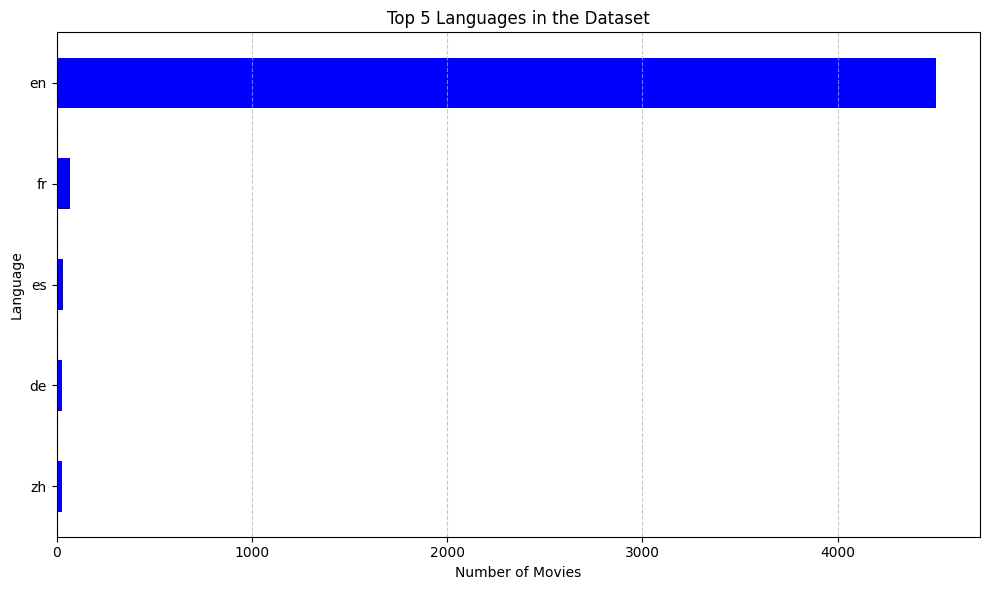

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'mov' is your DataFrame with the dataset and 'language' is the column name containing languages
# Count the occurrences of each language
language_counts = mov['original_language'].value_counts()

# Select the top 10 languages
top_10_languages = language_counts.nlargest(5)

# Plotting the horizontal bar chart for the top 5 languages
plt.figure(figsize=(10, 6))
top_10_languages.sort_values().plot(kind='barh', color='blue')
plt.title('Top 5 Languages in the Dataset')
plt.xlabel('Number of Movies')
plt.ylabel('Language')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


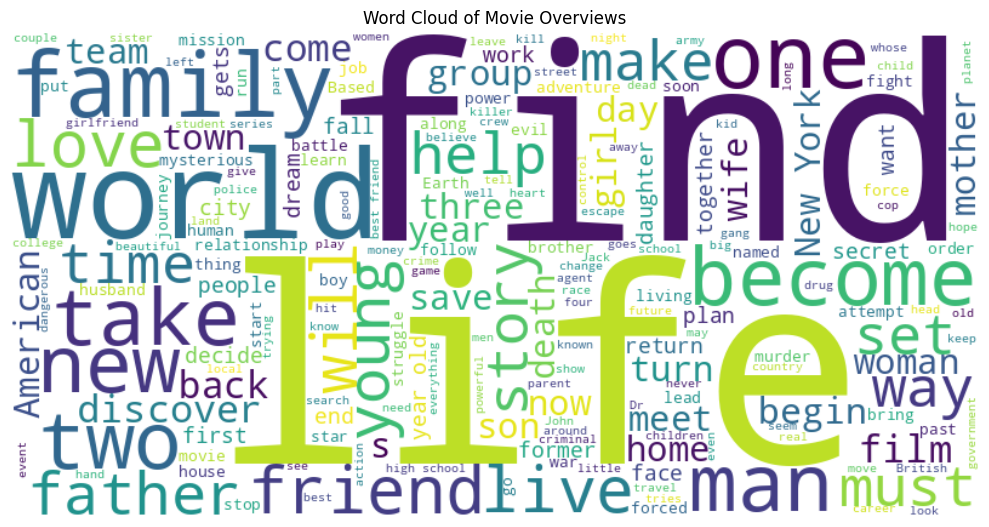

In [ ]:
overview_text = ' '.join(mov['overview'].dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(overview_text)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Movie Overviews')
plt.axis('off')  # Remove axis
plt.tight_layout()
plt.show()

## *Demographic Filtering*

TMDB 5000 Movie dataset is used.

In [ ]:
credits.columns = ['id','title','cast','crew']
mov = mov.merge(credits, on='id')
mov.head(3)

<ipython-input-231-f35c65f6d605>:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'title_x'} in the result is deprecated and will raise a MergeError in a future version.
  mov = mov.merge(credits, on='id')


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,crew_,title_y,cast_x,crew_x,title_x,cast_y,crew_y,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [ ]:
c = mov['vote_average'].mean()
print("Mean rating of all movies:",c)

Mean rating of all movies: 6.0934402332361515


In [ ]:
m = mov['vote_count'].quantile(0.9)
m

1839.2000000000044

In [ ]:
q_movies = mov.copy().loc[mov['vote_count'] >= m]
q_movies.shape

(481, 36)

In [ ]:
def weighted_rating(x, m=m, c=c):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * c)

In [ ]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
q_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title ', 'vote_average',
       'vote_count', 'title ', 'cast ', 'crew ', 'release_year', 'title_x',
       'cast_', 'crew_', 'title_y', 'cast_x', 'crew_x', 'title_x', 'cast_y',
       'crew_y', 'title_y', 'cast', 'crew', 'score'],
      dtype='object')

In [ ]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['original_title', 'vote_count', 'vote_average', 'score']].head(10)

,original_title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059333
662,Fight Club,9413,8.3,7.939332
65,The Dark Knight,12002,8.2,7.920083
3232,Pulp Fiction,8428,8.3,7.904731
96,Inception,13752,8.1,7.863298
3337,The Godfather,5893,8.4,7.851356
95,Interstellar,10867,8.1,7.809554
809,Forrest Gump,7927,8.2,7.803286
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727346
1990,The Empire Strikes Back,5879,8.2,7.698020


Text(0.5, 1.0, 'Popular Movies')

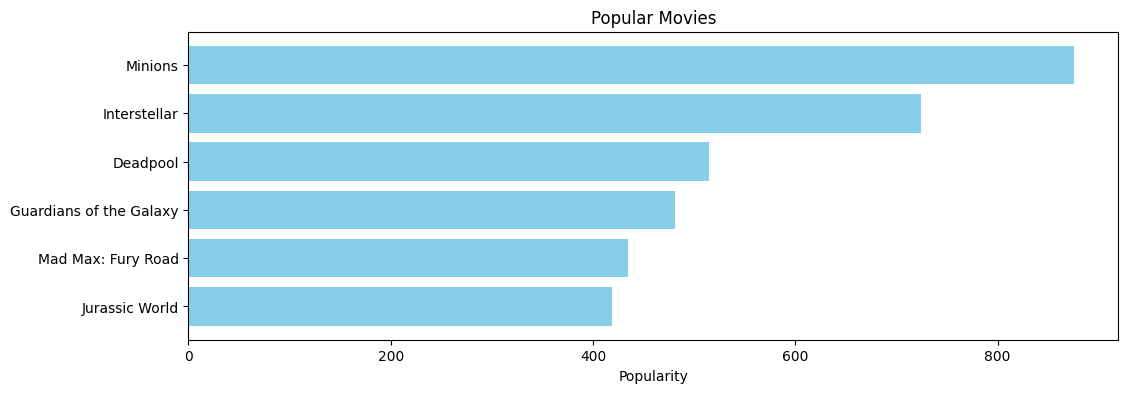

In [ ]:
pop = mov.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['original_title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

##*Content Based Filtering*

##### ***Movie-Plot Based Recommender***

TMDB 5000 Movie Dataset is used.

In [ ]:
# Text Processing for Overview
mov['overview'].head(5)


0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [ ]:
#Text Processing
#Removes all english stop words such as "the","a"
tfidf = TfidfVectorizer(stop_words = 'english')
mov['overview'] = mov['overview'].fillna('')

tfidf_matrix = tfidf.fit_transform(mov['overview'])
tfidf_matrix.shape

(4802, 20977)

In [ ]:
# Computing cosine similarity matrix
cos_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

In [ ]:
#Constructing a reverse map of Indices and movie titles
indices = pd.Series(mov.index, index = mov['original_title']).drop_duplicates()

In [ ]:
#Function that takes in movie title as input and outputs most similar movies

def cinemania(title, cos_sim=cos_sim):
    #Get the index of the movie that matches the title
    idx = indices[title]

    #Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cos_sim[idx]))

    #Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #Get the scores of the 10 most similar movies
    #After excluding the movie itself, since it's the most similar
    sim_scores = sim_scores[1:11]

    #Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    #Return the top 10 most similar movies
    return mov['original_title'].iloc[movie_indices]

In [ ]:
cinemania('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: original_title, dtype: object

In [ ]:
cinemania('Snowpiercer')

4350        An Inconvenient Truth
1643              Howard the Duck
4709    Antarctic Edge: 70° South
4427                       Charly
3840                        Train
2410                    Good Boy!
2768                    21 & Over
16                   The Avengers
1704                The Big Short
3330                    Die Welle
Name: original_title, dtype: object

##### ***Credits, Genre and Keywords Based Recommender***

In [ ]:
credits.columns = ['id','title','cast','crew']
mov = mov.merge(credits, on='id')
mov.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [ ]:
mov.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [ ]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

#Credits, Genres and Keywords Based Recommender

features = ['cast', 'crew', 'keywords','genres']
for feature in features: mov[feature] = mov[feature].apply(lambda x: literal_eval(str(x)))

In [ ]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [ ]:
# Define new director, cast, genres and keywords features that are in a suitable form.
mov['director'] = mov['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    mov[feature] = mov[feature].apply(get_list)

In [ ]:
mov[['original_title', 'cast', 'director', 'keywords', 'genres']].head(3)

,original_title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [ ]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    mov[feature] = mov[feature].apply(clean_data)

In [ ]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
mov['soup'] = mov.apply(create_soup, axis=1)

In [ ]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(mov['soup'])

In [ ]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
# Reset index of our main DataFrame and construct reverse mapping as before
mov = mov.reset_index()
indices = pd.Series(mov.index, index = mov['original_title'])

In [ ]:
#Credit, Genre & Keyword based recommender
cinemania('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: original_title, dtype: object

In [ ]:
cinemania('Takers', cosine_sim2)

4638    Amidst the Devil's Wings
3326              Black November
1986                      Faster
747               Gangster Squad
1253               Kiss of Death
1278                  The Gunman
2154                Street Kings
3725                 The Sweeney
4664                     Bronson
3          The Dark Knight Rises
Name: original_title, dtype: object

In [ ]:
#Plot based recommender
cinemania('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: original_title, dtype: object

## *Collaborative Filtering*

MovieLens dataset is used.

In [ ]:
from surprise import SVD, Dataset, Reader
reader = Reader()
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.matrix_factorization import SVD
import pandas as pd

reader = Reader()
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
df = pd.DataFrame(data.raw_ratings, columns=['userId', 'movieId', 'rating', 'timestamp'])
algo = SVD()
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8752  0.8591  0.8745  0.8663  0.8735  0.8697  0.0062  
MAE (testset)     0.6724  0.6656  0.6736  0.6663  0.6736  0.6703  0.0036  
Fit time          2.99    2.72    1.57    1.55    1.64    2.10    0.63    
Test time         1.33    0.14    0.13    0.13    0.12    0.37    0.48    


In [ ]:
print("RMSE Test results: ", results['test_rmse'])
print("MAE Test results: ", results['test_mae'])

RMSE Test results:  [0.87520697 0.85905688 0.8744811  0.86625332 0.87348329]
MAE Test results:  [0.67244558 0.66562008 0.67359725 0.6662729  0.67356503]


In [ ]:
trainset = data.build_full_trainset()
algo.fit(trainset)

In [ ]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
108,1,48780,4.0,1217897632
109,1,49272,3.5,1217896576
110,1,52973,3.5,1217897820
111,1,54286,4.0,1217896447


In [ ]:
algo.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=3.5236334198212647, details={'was_impossible': False})